# Bibliotecas

In [71]:
# ! pip install pmdarima
# ! pip install ptitprince
# ! pip install pandas -U

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error)
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from math import sqrt

# Dataset

1: Cooler condition / %:
	
    *   3: close to total failure
	*   20: reduced effifiency
    *   100: full efficiency

2: Valve condition / %:
	
    *   100: optimal switching behavior
	
    *   90: small lag
	
    *   80: severe lag
	
    *   73: close to total failure

3: Internal pump leakage:
	
    *   0: no leakage
	
    *   1: weak leakage
	
    *   2: severe leakage

4: Hydraulic accumulator / bar:
	
    *   130: optimal pressure
	
    *   115: slightly reduced pressure
	
    *   100: severely reduced pressure
	
    *   90: close to total failure

5: Stable flag:
	
    *   0: conditions were stable
	
    *   1: static conditions might not have been reached yet

|Sensor		|Physical quantity		        |Unit		|Sampling rate|
|-----------|-------------------------------|-----------|-------------|
|PS1		|Pressure			            |bar		|100 Hz|
|PS2		|Pressure			            |bar		|100 Hz|
|PS3		|Pressure			            |bar		|100 Hz|
|PS4		|Pressure			            |bar		|100 Hz|
|PS5		|Pressure			            |bar	    |100 Hz|
|PS6		|Pressure			            |bar		|100 Hz|
|EPS1		|Motor power			        |W	    	|100 Hz|
|FS1		|Volume flow			        |l/min		|10 Hz|
|FS2		|Volume flow			        |l/min		|10 Hz|
|TS1		|Temperature			        |°C		    |1 Hz|
|TS2		|Temperature			        |°C	    	|1 Hz|
|TS3		|Temperature			        |°C	    	|1 Hz|
|TS4		|Temperature			        |°C	    	|1 Hz|
|VS1		|Vibration			            |mm/s		|1 Hz|
|CE		    |Cooling efficiency (virtual)	|%	    	|1 Hz|
|CP		    |Cooling power (virtual)		|kW	    	|1 Hz|
|SE		    |Efficiency factor		        |%	    	|1 Hz|

# Data Preperation

In [73]:
# a = []
# for i in ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6']:
#     PS = np.genfromtxt(r'/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/'+ i +'.txt')
#     a.append(PS)
    
# ps1, ps2, ps3, ps4, ps5, ps6 = a

In [74]:
# ps1_arr = ps1.mean(axis=1)
# ps2_arr = ps2.mean(axis=1)
# ps3_arr = ps3.mean(axis=1)
# ps4_arr = ps4.mean(axis=1)
# ps5_arr = ps5.mean(axis=1)
# ps6_arr = ps6.mean(axis=1)

In [75]:
# df = pd.DataFrame({'PS1':ps1_arr,
#                    'PS2':ps2_arr,
#                    'PS3':ps3_arr,
#                    'PS4':ps4_arr,
#                    'PS5':ps5_arr,
#                    'PS6':ps6_arr})

In [76]:
# eps1 = np.genfromtxt(r'/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/EPS1.txt')

# esp1_arr = eps1.mean(axis=1)

# df['ESP1'] = esp1_arr

In [77]:
# a = []
# for i in ['FS1', 'FS2']:
#     FS = np.genfromtxt(r'/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/' + i +'.txt')
#     a.append(FS)

# fs1, fs2 = a

# fs1_arr = fs1.mean(axis=1)
# fs2_arr = fs2.mean(axis=1)

# df['FS1'] = fs1_arr
# df['FS2'] = fs2_arr

In [78]:
# a = []
# for i in ['TS1', 'TS2', 'TS3', 'TS4']:
#     TS = np.genfromtxt(r'/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/' + i + '.txt')
#     a.append(TS)
    
# ts1, ts2, ts3, ts4 = a

# ts1_arr = ts1.mean(axis=1)
# ts2_arr = ts2.mean(axis=1)
# ts3_arr = ts3.mean(axis=1)
# ts4_arr = ts4.mean(axis=1)

# df['TS1'] = ts1_arr
# df['TS2'] = ts2_arr
# df['TS3'] = ts3_arr
# df['TS4'] = ts4_arr

In [79]:
# vs1 = np.genfromtxt(r'/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/VS1.txt')

# vs1_arr = vs1.mean(axis=1)

# df['VS1'] = vs1_arr

In [80]:
# a = []
# for i in ['CE', 'CP']:
#     C = np.genfromtxt(r'/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/CE.txt')
#     a.append(C)

# ce,cp = a

# ce_arr = ce.mean(axis=1)

# cp_arr = cp.mean(axis=1)

# df['CE'] = ce_arr
# df['CP'] = cp_arr

In [81]:
# se = np.genfromtxt(r'/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/SE.txt')

# se_arr = se.mean(axis=1)

# df['SE'] = se_arr

In [82]:
# target = np.genfromtxt(r'/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/profile.txt')

# df_temp = pd.DataFrame(target, columns=['Cooler_Condition',
#                                         'Valve_Condition',
#                                         'Internal_Pump_Leakage',
#                                         'Hydraulic_Accumulator',
#                                         'Stable_Flag'])

# df = pd.concat([df, df_temp], axis=1)

## Saving dataset as csv

In [83]:
# df.to_csv('/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/df_joined.csv',
#           sep=',',
#           encoding='utf-8',
#           index=False)

In [84]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Predictive Maintenance Of Hydraulics System/df_joined.csv',
                     sep=',',
                     encoding='utf-8')

In [85]:
df

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.000000,9.842170,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,39.601350,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,25.786433,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,22.218233,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337430,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,20.459817,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,19.787017,59.455267,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.227572,109.779581,2.001438,10.202473,9.972037,9.850361,2543.911033,6.689930,10.184515,35.313783,...,30.404733,0.550833,46.628517,46.628517,59.033100,100.0,100.0,0.0,90.0,0.0
2201,161.206070,109.787481,1.998781,10.197919,9.966184,9.844854,2543.411333,6.692182,10.177767,35.321600,...,30.416233,0.547483,46.689817,46.689817,59.068000,100.0,100.0,0.0,90.0,0.0
2202,161.192120,109.756174,1.993436,10.196824,9.964329,9.842629,2542.729767,6.693277,10.176172,35.319183,...,30.426250,0.545233,46.472300,46.472300,59.132350,100.0,100.0,0.0,90.0,0.0
2203,161.208917,109.793884,2.007077,10.198588,9.968232,9.846690,2544.046333,6.684128,10.178353,35.324767,...,30.414283,0.537017,46.544967,46.544967,58.970800,100.0,100.0,0.0,90.0,0.0


# Exploratory Data Analysis

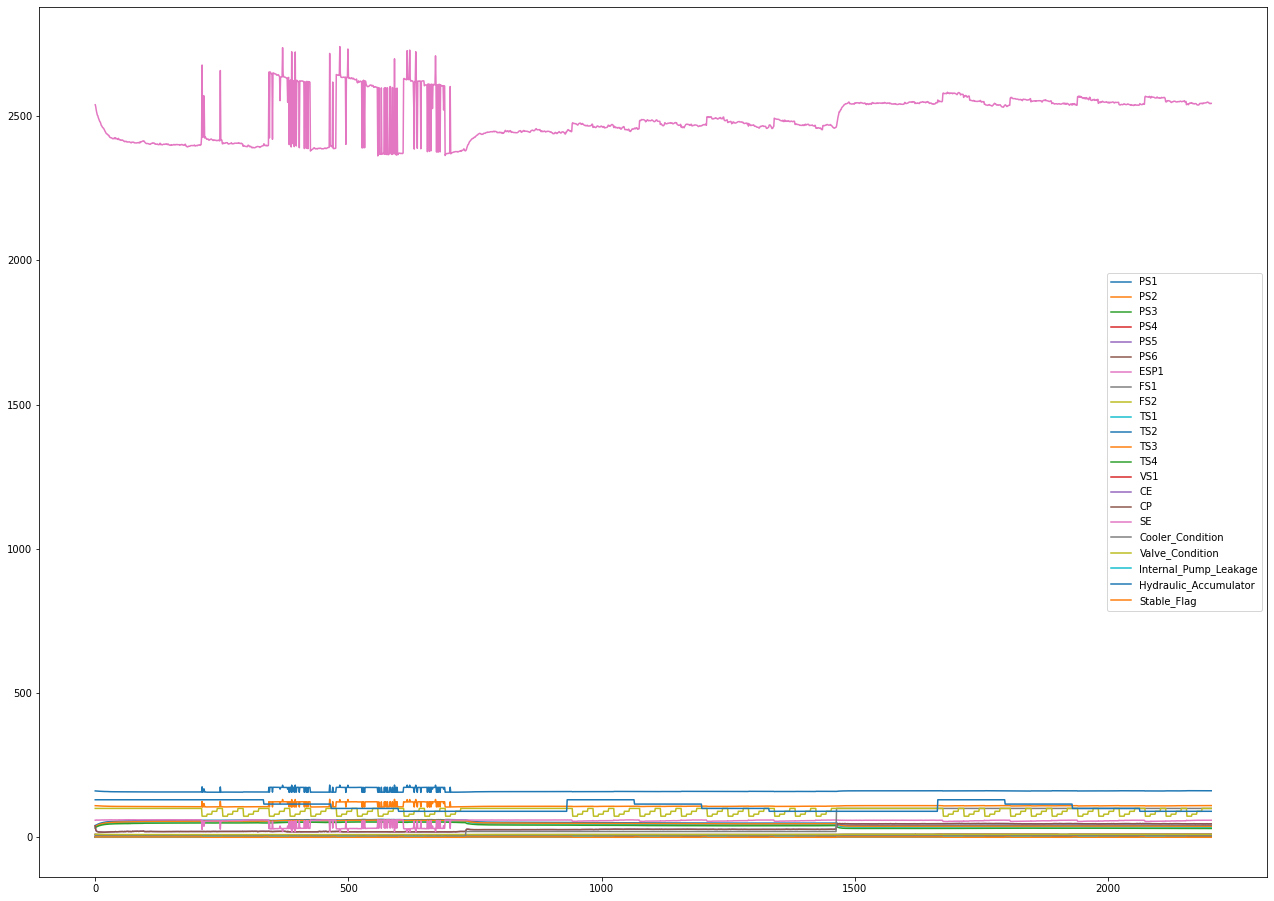

In [86]:
df.plot(figsize=(22, 16))

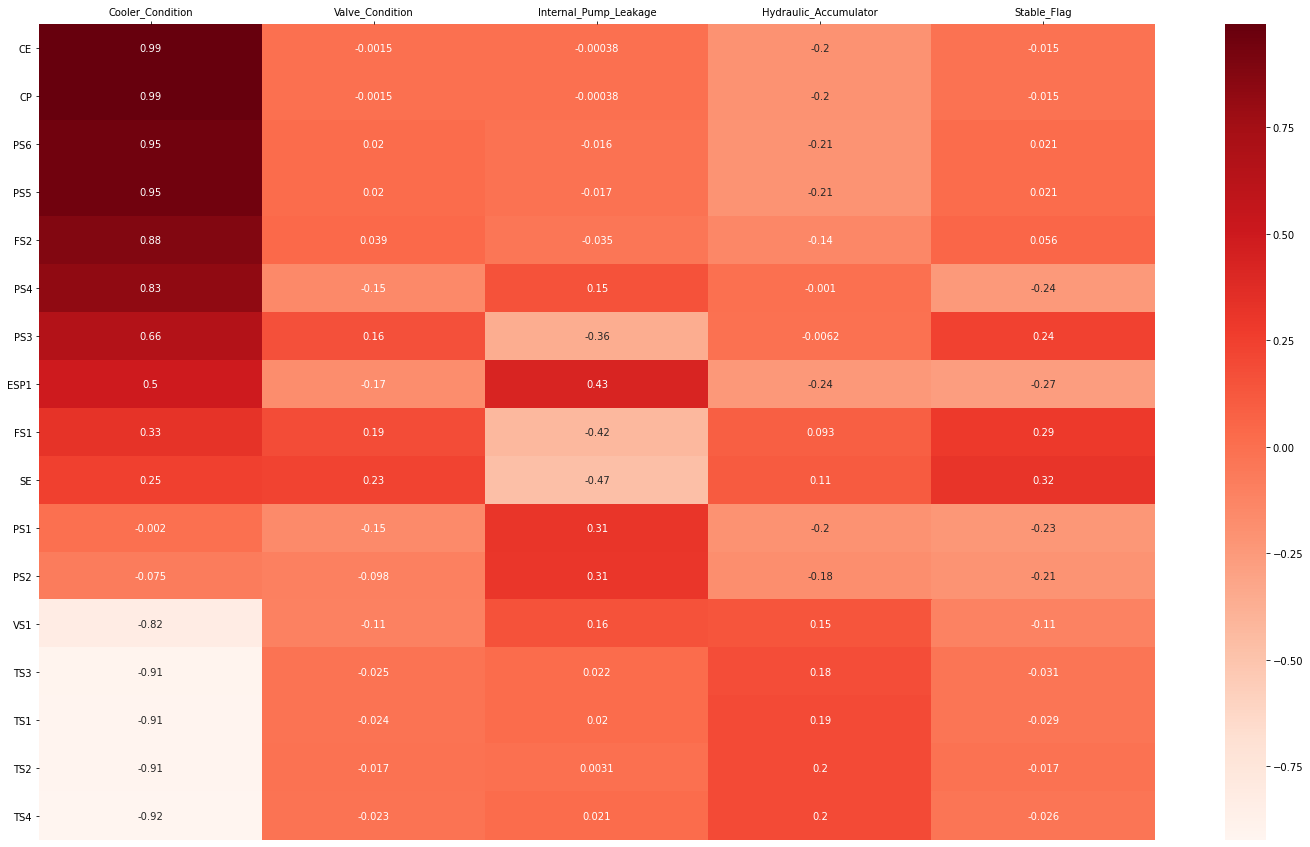

In [100]:
# Dataframe de correlação entre todas os dados
df_corr = df.corr().sort_values(['Cooler_Condition',
                                 'Valve_Condition',
                                 'Internal_Pump_Leakage',
                                 'Hydraulic_Accumulator',
                                 'Stable_Flag'],
                                ascending=False)

# Dataframe corrleação com targets
df_corr_target = df_corr[['Cooler_Condition',
                          'Valve_Condition',
                          'Internal_Pump_Leakage',
                          'Hydraulic_Accumulator',
                          'Stable_Flag']]

# Apaga linhas com targets
df_corr_target = df_corr_target.copy()
df_corr_target.drop(['Cooler_Condition',
                     'Valve_Condition',
                     'Internal_Pump_Leakage',
                     'Hydraulic_Accumulator',
                     'Stable_Flag'],
                    axis=0,
                    inplace=True)

# Análise gráfica
ax = sns.heatmap(df_corr_target,
                 annot=True,
                 cmap='Reds')

ax.figure.set_size_inches(25, 15)

ax.xaxis.tick_top()